In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the required modules
import numpy as np
from scipy.stats import mode
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score,roc_curve

In [90]:
df = pd.read_csv("Prostate_Cancer.csv")

In [91]:
df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [92]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [93]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [94]:
# df = pd.get_dummies(df, columns=['diagnosis_result'], drop_first=True )
df=df.replace({'diagnosis_result':{'M':1,'B':0}})


In [95]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [96]:
df.dtypes

id                     int64
diagnosis_result       int64
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [97]:
df.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [98]:
x = df.drop(columns=['id','diagnosis_result'])
y = df['diagnosis_result']


In [99]:

X = (x - x.mean()) / x.std()  
Y = y

In [100]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [101]:
# Split the data into training and testing sets
split_ratio = 0.7
split_index = int(len(X) * split_ratio)
x_train, x_test = X[:split_index], X[split_index:]
y_train , y_test = Y[:split_index], Y[split_index:]

In [102]:

class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
    
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)
        
    # Store train set
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions
    def predict(self, X_test):
        preds = []
        X_test = np.array(X_test)
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            classes, counts = np.unique(nearest_neighbours, return_counts=True)
            majority_index = np.argmax(counts)
            majority = classes[majority_index]
            preds.append(majority)
        return np.array(preds)
    
    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()
        
        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))
            
        # Sort distances
        distances.sort(key=lambda x: x[0])
        
        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours

In [103]:
import numpy as np

class RadiusNearestNeighbor:
    def __init__(self, radius=1.0):
        self.radius = radius
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.most_frequent  = int(mode(y).mode[0])
        

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            neighbors = self.find_neighbors(x)
            
            if neighbors :
                # Majority voting to determine the predicted class
                predicted_class = int(mode(neighbors).mode[0])
                predictions.append(predicted_class)
            else:
                # If no neighbors found, assign a default label
                predictions.append(self.most_frequent )
        return np.array(predictions)

    def find_neighbors(self, x):
        neighbors = []
        for i, x_train in enumerate(self.X_train):
            distance = np.linalg.norm(x - x_train)
            if distance <= self.radius:
                neighbors.append(self.y_train[i])

        if neighbors:
            return neighbors
        else:
            return None


In [104]:
knn =kNN()

In [105]:
knn.fit(x_train , y_train)

In [106]:
y_pre_knn = knn.predict (x_test)

In [107]:

# cm = confusion_matrix(y_test, y_pre_knn)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()



In [108]:
def confusion_matrix(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[true_negative, false_positive],
                     [false_negative, true_positive]])









In [109]:
cm = confusion_matrix(y_test, y_pre_knn)
cm

array([[ 6,  9],
       [ 0, 15]], dtype=int64)

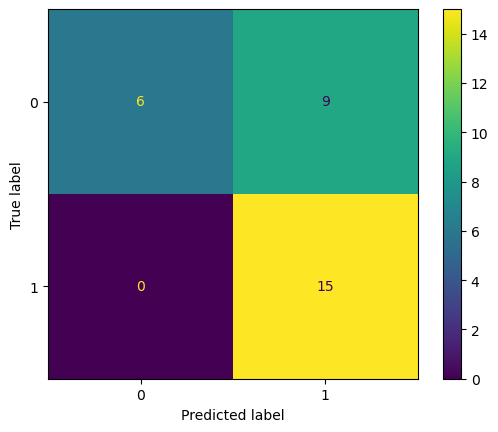

In [110]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [111]:
TN = cm[0, 0]
FP = cm[1, 0]
TP = cm[1, 1]
FN = cm[0, 1]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.7
Precision: 1.0
Recall: 0.625
F1-Score: 0.7692307692307693


In [112]:
# Create and train the RNN classifier
rnn = RadiusNearestNeighbor(radius=2.0)
rnn.fit(x_train, y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_13504\2830268033.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.most_frequent  = int(mode(y).mode[0])


In [113]:
# Make predictions
y_pre_rnn = rnn.predict(x_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_13504\2830268033.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predicted_class = int(mode(neighbors).mode[0])


In [114]:
cm = confusion_matrix(y_test, y_pre_rnn)
cm

array([[ 9,  6],
       [ 0, 15]], dtype=int64)

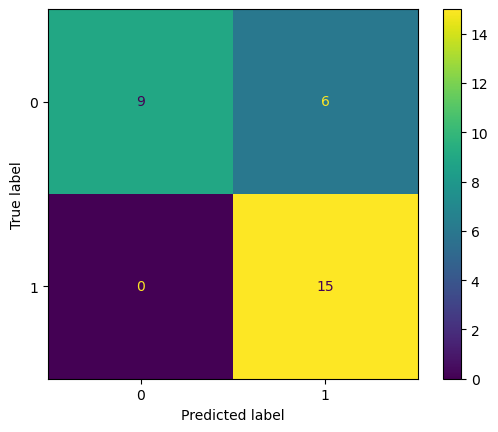

In [115]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [116]:
TN = cm[0, 0]
FP = cm[1, 0]
TP = cm[1, 1]
FN = cm[0, 1]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8
Precision: 1.0
Recall: 0.7142857142857143
F1-Score: 0.8333333333333333
